In [5]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo2/conn/spearman/dataset_dict_prune/lofo_categories'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [6]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo2/conn/tmp/dataset_dict_prune.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

One or Two-Tail P Values?

- ``` tails = 'one_tail' or tails = 'two_tail' ```

Numer of permutations? 
- Pearson is ~10x faster than Spearman

Would you like to compare maps wiht spearman or pearson?

- ``` method = 'spearman' or method = 'pearson' ```

Would you like to FWE correct the pairwise matrix?

- ``` fwe = True or fwe = False ```

In [3]:
tails = 'two_tail'
n_permutations = 1000
method = 'spearman'
fwe = False
datasets_to_flip = []#'Alzheimer Disease', 'Multiple Sclerosis', 'Penetrating TBI']# ['Parietal TMS Hebscher'] #['adni_Alzheimer', 'corbetta_memory', 'manitoba_memory', 'ms_memory']

Run it

In [4]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=datasets_to_flip,
                                           n_permutations=n_permutations,
                                           out_dir=out_dir,
                                           topology_command=None)
p_value, pairwise_p_values = correlation_analysis.run(tails, fwe)

KeyboardInterrupt: 

# 02 - Visualize Results

Similarity matrix (Signs Included)

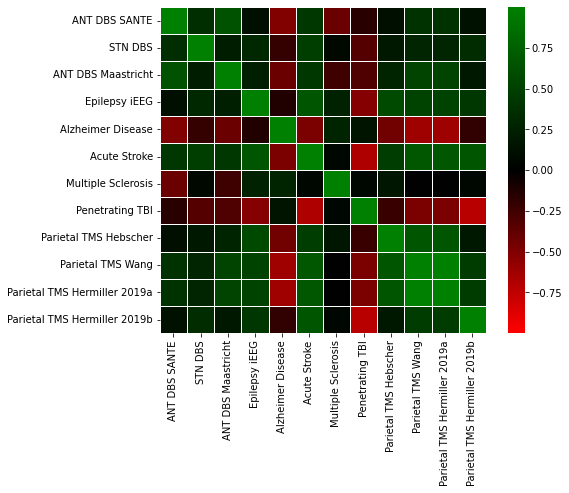

In [ ]:
limit = correlation_analysis.matrix_heatmap(correlation_analysis.original_similarity_matrix, type='similarity', output_path=out_dir)

View the Overall Similarities of the Topology, Signs Aside

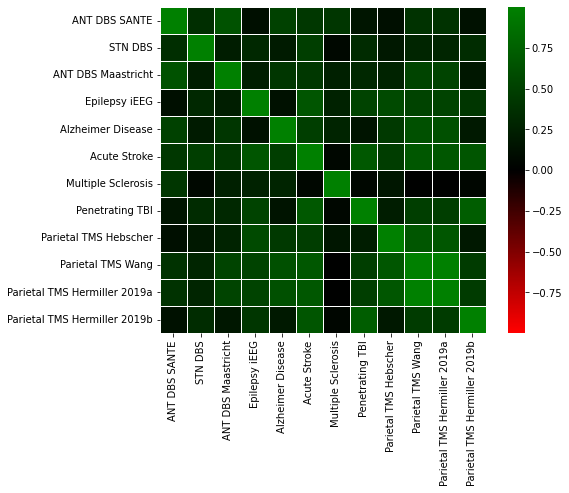

In [ ]:
import numpy as np
limit = correlation_analysis.matrix_heatmap(np.abs(correlation_analysis.original_similarity_matrix), type='similarity', output_path=out_dir+'/heatmap_similarity_absval.svg')

Permuted Similarity

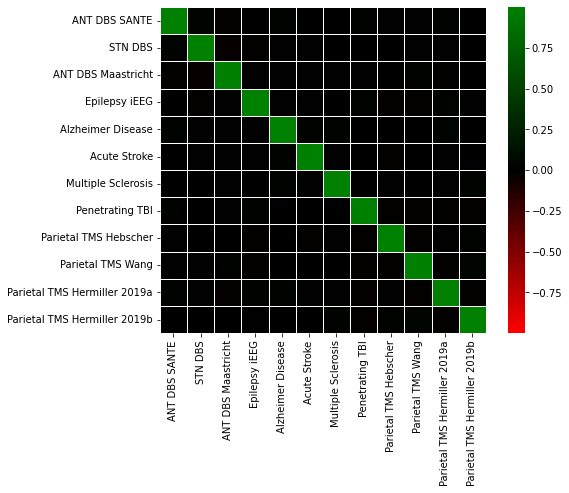

In [ ]:
import numpy as np
avg_sim_mx = np.mean(correlation_analysis.permuted_similarity_tensor, axis=0)
l = correlation_analysis.matrix_heatmap(avg_sim_mx, type='similarity', output_path=out_dir+'/heatmap_similarity_permuted.svg', limit=limit)

Pairwise P values Matrix

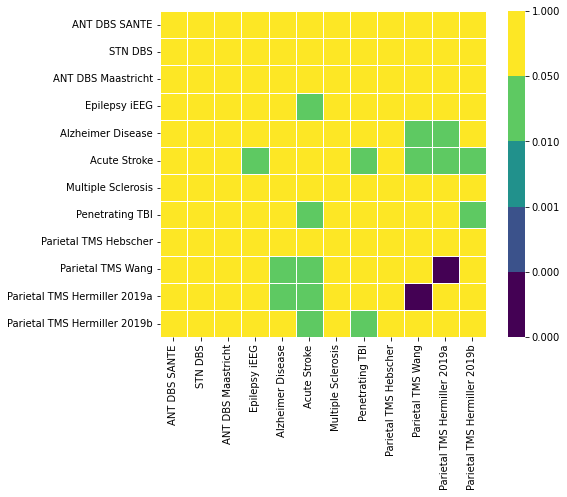

In [ ]:
correlation_analysis.matrix_heatmap(pairwise_p_values, type='pvals', output_path=out_dir)

In [ ]:
pairwise_p_values

array([[1.   , 0.247, 0.073, 0.735, 0.072, 0.13 , 0.112, 0.646, 0.65 ,
        0.241, 0.23 , 0.706],
       [0.247, 1.   , 0.539, 0.354, 0.497, 0.118, 0.838, 0.345, 0.484,
        0.424, 0.426, 0.319],
       [0.073, 0.539, 1.   , 0.447, 0.137, 0.153, 0.388, 0.351, 0.3  ,
        0.076, 0.083, 0.589],
       [0.735, 0.354, 0.447, 1.   , 0.747, 0.017, 0.405, 0.166, 0.052,
        0.155, 0.138, 0.27 ],
       [0.072, 0.497, 0.137, 0.747, 1.   , 0.132, 0.433, 0.741, 0.089,
        0.032, 0.035, 0.6  ],
       [0.13 , 0.118, 0.153, 0.017, 0.132, 1.   , 0.866, 0.033, 0.074,
        0.018, 0.012, 0.022],
       [0.112, 0.838, 0.388, 0.405, 0.433, 0.866, 1.   , 0.922, 0.548,
        0.995, 0.986, 0.894],
       [0.646, 0.345, 0.351, 0.166, 0.741, 0.033, 0.922, 1.   , 0.52 ,
        0.237, 0.215, 0.04 ],
       [0.65 , 0.484, 0.3  , 0.052, 0.089, 0.074, 0.548, 0.52 , 1.   ,
        0.079, 0.077, 0.715],
       [0.241, 0.424, 0.076, 0.155, 0.032, 0.018, 0.995, 0.237, 0.079,
        1.   , 0.   

# Optional - Run a Leave-One-Fold-Out Evaluation
- This assesses if any specific dataset or datasets are driving your effect

Define Parameters

In [7]:
tails = 'two_tail'
n_permutations = 1000
method = 'spearman'
fwe = False
datasets_to_flip = []

Define folds as an array of lists. Each list is a fold which will be left out during the evaluation. 
- The names you can enter are in your JSON file, printed below

In [8]:
import json

with open(dict_path, 'r') as f:
    data_dict = json.load(f)

print(data_dict.keys())

dict_keys(['ANT DBS SANTE', 'STN DBS', 'ANT DBS Maastricht', 'Epilepsy iEEG', 'Alzheimer Disease', 'Acute Stroke', 'Multiple Sclerosis', 'Penetrating TBI', 'Parietal TMS Hebscher', 'Parietal TMS Wang', 'Parietal TMS Hermiller 2019a', 'Parietal TMS Hermiller 2019b'])


In [9]:
folds = [['ANT DBS SANTE','STN DBS','ANT DBS Maastricht','Epilepsy iEEG'], ['Alzheimer Disease', 'Acute Stroke', 'Multiple Sclerosis', 'Penetrating TBI'], ['Parietal TMS Hebscher', 'Parietal TMS Wang', 'Parietal TMS Hermiller 2019a', 'Parietal TMS Hermiller 2019b']]

Run Evaluation

In [11]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=[],
                                           n_permutations=n_permutations,
                                           out_dir=out_dir,
                                           topology_command=None)
p_value, pairwise_p_values = correlation_analysis.run_lofo(folds, tails, fwe)

Running permutations: 100%|██████████| 1000/1000 [32:05<00:00,  1.93s/it]


Calculating two-tailed p-values
The observed average similarity is: 0.36309212616290965
The two_tail p-value is: 0.031. This is the proportion of permuted averages that are greater than the observed average.
  Left Out Dataset: ['ANT DBS SANTE', 'STN DBS', 'ANT DBS Maastricht', 'Epilepsy iEEG']
    P-value: 0.0310
    Observed Average Similarity: 0.3631
    Pairwise P-values:
      Alzheimer Disease: 0.0000
      Acute Stroke: 0.8770
      Multiple Sclerosis: 0.0000
      Penetrating TBI: 0.0000
      Parietal TMS Hebscher: 0.8970
      Parietal TMS Wang: 0.8990
      Parietal TMS Hermiller 2019a: 0.8850
      Parietal TMS Hermiller 2019b: 0.0000


Running permutations: 100%|██████████| 1000/1000 [06:22<00:00,  2.61it/s]


Calculating two-tailed p-values
The observed average similarity is: 0.34230405436453437
The two_tail p-value is: 0.033. This is the proportion of permuted averages that are greater than the observed average.
  Left Out Dataset: ['Alzheimer Disease', 'Acute Stroke', 'Multiple Sclerosis', 'Penetrating TBI']
    P-value: 0.0330
    Observed Average Similarity: 0.3423
    Pairwise P-values:
      ANT DBS SANTE: 0.0000
      STN DBS: 0.9960
      ANT DBS Maastricht: 0.7580
      Epilepsy iEEG: 0.5940
      Parietal TMS Hebscher: 0.8590
      Parietal TMS Wang: 0.8720
      Parietal TMS Hermiller 2019a: 0.8860
      Parietal TMS Hermiller 2019b: 0.0000


Running permutations: 100%|██████████| 1000/1000 [34:18<00:00,  2.06s/it]

Calculating two-tailed p-values
The observed average similarity is: 0.2850234431226295
The two_tail p-value is: 0.095. This is the proportion of permuted averages that are greater than the observed average.
  Left Out Dataset: ['Parietal TMS Hebscher', 'Parietal TMS Wang', 'Parietal TMS Hermiller 2019a', 'Parietal TMS Hermiller 2019b']
    P-value: 0.0950
    Observed Average Similarity: 0.2850
    Pairwise P-values:
      ANT DBS SANTE: 0.0000
      STN DBS: 0.9940
      ANT DBS Maastricht: 0.7330
      Epilepsy iEEG: 0.6070
      Alzheimer Disease: 0.0000
      Acute Stroke: 0.8710
      Multiple Sclerosis: 0.0000
      Penetrating TBI: 0.0000


TypeError: cannot unpack non-iterable NoneType object

# Optional - Evaluate P-Values Across Specific Slices of the Similarity Matrix

In [ ]:
import numpy as np
obsv = np.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo2/conn/spearman/all_data/unaligned/original_similarity_matrix.npy')
perm = np.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo2/conn/spearman/all_data/unaligned/permuted_similarity_tensor.npy')

In [ ]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis

p, r = CorrelationAnalysis.calculate_slice_p_value(
    obsv,
    perm,
    row_indices=[8,9,10,11],
    col_indices=[8,9,10,11],
    method='two_tail',
    absolute_similarity=True,
    remove_diagonal=True
)
print("p: ", p)
print("r: ", r)

p:  0.041
r:  0.43020064295854193
